In [35]:
import numpy as np
import DeltaVar as dv
import matplotlib.pyplot as plt
import time
import pickle
import os
from tqdm import tqdm

In [36]:
L = 10**(np.linspace(-1.8,-0.6, 100))
v = 1.5

In [37]:
DATADIR = 'D:/UnexponentiatedPeriodic/'

In [38]:
y_test = np.loadtxt(os.path.join(DATADIR,'labels/labels.txt'))
print(y_test)

[0.96360873 0.61810042 0.81024352 ... 0.91858242 0.47694267 0.41836978]


In [39]:
path = os.path.join(DATADIR,'features')
c=0
prediction = []
for img in tqdm(os.listdir(path)):
    img_array = np.loadtxt(os.path.join(path,img))
    delta_var_img = [dv.DeltaVar(img_array, l, periodicity=True) for l in L]
    params = dv.HurstEstimator(delta_var_img,L)
    prediction.append(params[0])
    c+=1

  0%|▎                                                                                | 7/2000 [00:02<10:14,  3.24it/s]C:\Users\C1764397\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [09:06<00:00,  3.66it/s]


In [40]:
import NeuralNet as nn
print(prediction)

[1.516690491194003, 1.602984537847929, 1.4899213971208507, 1.483166226661798, 1.4867575383563776, 1.703887104768449, 2.027867379074556, 2.6237786368898592, 1.9294163686048766, 2.1017693736028846, 3.0127530770152795, 1.4778109283675156, 2.1688797814373997, 1.5175235160498444, 1.7467333686428255, 2.160156407841527, 2.6354857006894994, 1.4634916947683507, 1.7591171159145662, 1.553009773054356, 1.7937300723656753, 1.7366295838722898, 2.213384248445596, 1.5013892233738022, 2.04742624929187, 1.7914007262132596, 1.5984741294788352, 1.4976790258696835, 1.6256964862091428, 1.498915723546859, 2.0504797024522086, 1.8910495434822998, 2.165837604030338, 2.5242623928260586, 2.217424642653514, 1.5050530223510084, 1.8999869418177218, 1.4962833955136414, 2.9859770054414687, 1.6186302305545, 1.8659114309601206, 1.4707005882426492, 2.212315003913384, 2.7093426314621736, 1.4757413215034676, 1.546096741490783, 1.9406660220895207, 1.640802497547782, 1.4833012159480496, 1.484276685643513, 1.4828760125135596,

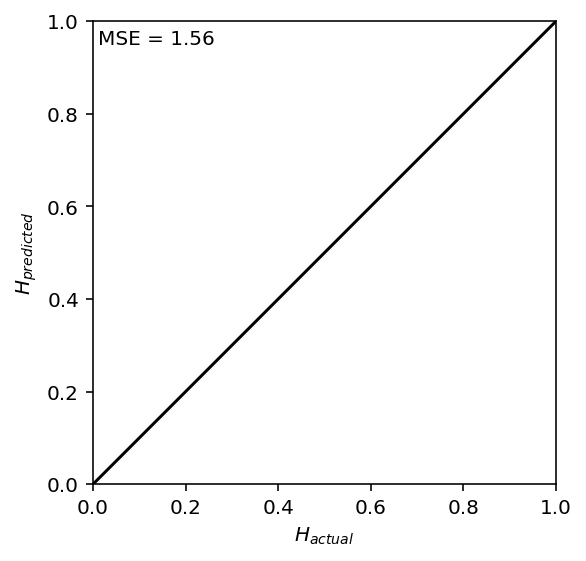

In [41]:
plt.figure(dpi=144)
plt.axes().set_aspect('equal')
plt.scatter(y_test,prediction)
plt.plot([0,1],[0,1],c='k')
plt.text(0.01, 0.95, 'MSE = '+ '{:.3g}'.format(nn.RMSE(y_test,prediction)))
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$H_{actual}$')
plt.ylabel(r'$H_{predicted}$')
plt.tight_layout()
plt.savefig('D:/UnexponentiatedPeriodic/DeltaVarPerformance.png')
plt.show()